In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv("AAP_data.csv", index_col=['date'], parse_dates=['date'], dayfirst=True)
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP
2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP
2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP
2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP
2013-02-14,78.66,79.72,78.5850,78.84,1005376,AAP


In [42]:
import matplotlib
from matplotlib import pyplot as plt

<Axes: xlabel='date'>

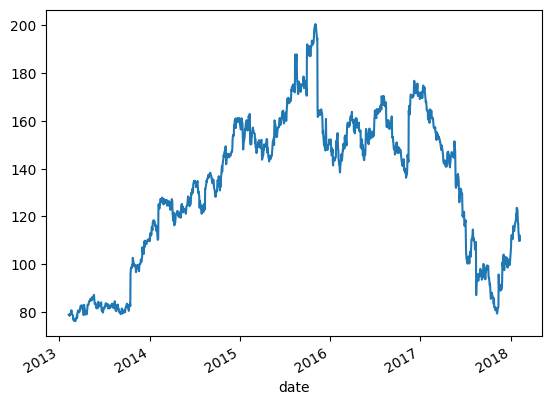

In [43]:
df['close'].plot()

In [44]:
from statsmodels. tsa.stattools import adfuller
adfuller(df['close'])

(-1.7863740362193679,
 0.38724728162952976,
 5,
 1253,
 {'1%': -3.4355796466416777,
  '5%': -2.863849421064024,
  '10%': -2.5679995625056926},
 5773.665955366652)

In [51]:
df_close = df['close'] 
df_close_diff = df_close.diff(periods=1).dropna()

In [52]:
adfuller(df_close_diff)

(-16.399383339154955,
 2.647230583423173e-29,
 4,
 1253,
 {'1%': -3.4355796466416777,
  '5%': -2.863849421064024,
  '10%': -2.5679995625056926},
 5770.833298150584)

<Axes: xlabel='date'>

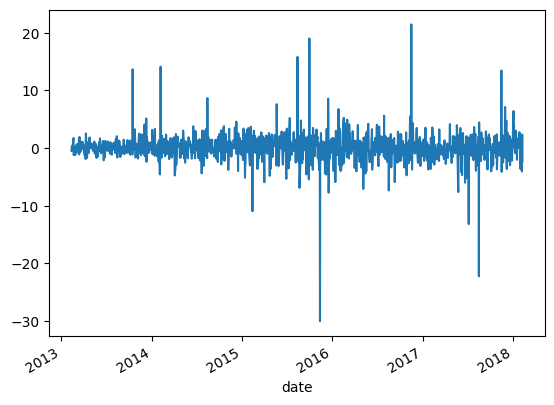

In [53]:
df_close_diff.plot()

<Axes: xlabel='date'>

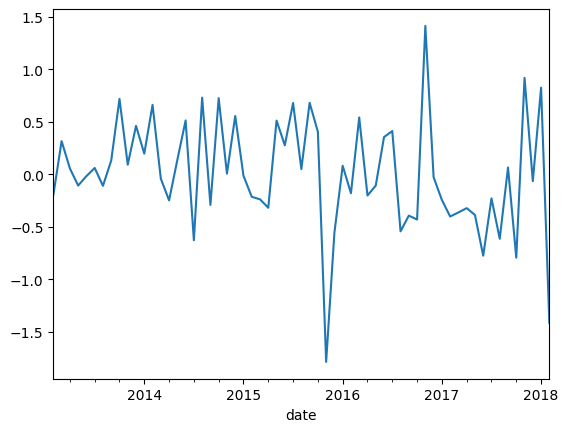

In [55]:
df_close_diff = df_close_diff.resample('M').mean()
df_close_diff.plot()

In [57]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.8 MB/s eta 0:00:00


In [58]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df_close_diff)

(0.01, False)

In [69]:
train_size = int(len(df_close_diff) * 0.90)
train, test = df_close_diff[0:train_size], df_close_diff[train_size:]

In [70]:
from pmdarima.arima import auto_arima
df_close_diff_fit = auto_arima(train, start_p=0, d=1, start_q=0,
                         max_p=5, max_d=5, max_q=5, start_P=0,
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         supress_warnings=True, stepwise = True,
                         random_state=20, n_fits = 50 )

In [71]:
df_close_diff_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(3, 1, 1)x(2, 1, [], 12)   Log Likelihood                 -42.017
Date:                             Wed, 26 Apr 2023   AIC                             98.035
Time:                                     16:43:30   BIC                            110.030
Sample:                                 02-28-2013   HQIC                           102.403
                                      - 07-31-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0549      0.216     -0.254      0.800      -0.479       0.369
ar.L2          0.0165      0.268      0.062      0.951      -0.508       0.541
ar.L3         -0.2182      0.266     -0.822      0.411      -0.739       0.302
ma.L1         -0.9151      0.313     -2.925      0.003      -1.528      -0.302
ar.S.L12      -1.0106      0.196     -5.150      0.000      -1.395      -0.626
ar.S.L24      -0.5933      0.324     -1.829      0.067      -1.229       0.042
sigma2         0.2820      0.126      2.240      0.025       0.035       0.529
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 3.15
Prob(Q):                              0.84   Prob(JB):                         0.21
Heteroskedasticity (H):               4.30   Skew:                            -0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
prediction = df_close_diff_fit.predict(n_periods=22)
prediction

2017-08-31    0.240434
2017-09-30    0.029129
2017-10-31    0.278481
2017-11-30   -1.047292
2017-12-31   -0.228378
2018-01-31   -0.243235
2018-02-28   -0.480373
2018-03-31   -0.184883
2018-04-30   -0.555575
2018-05-31   -0.020139
2018-06-30    0.034802
2018-07-31    0.294571
2018-08-31   -0.482449
2018-09-30   -0.043235
2018-10-31   -0.225497
2018-11-30   -0.741628
2018-12-31   -0.621892
2019-01-31   -0.333827
2019-02-28   -0.552315
2019-03-31   -0.111311
2019-04-30   -0.531050
2019-05-31   -0.507778
Freq: M, dtype: float64

In [73]:
y = df['close']
y_pred = prediction

d = y - y_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
print("MAE:",mae_f)
print("MSE:", mse_f)

MAE: 99.60040315662697
MSE: 10082.662804887479
